In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('countries of the world.csv',decimal=',')



<AxesSubplot:>

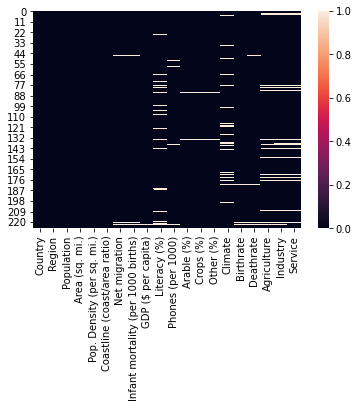

In [29]:
sns.heatmap(df.isnull())

In [30]:
print('number of missing data:')
print(df.isnull().sum())


number of missing data:
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


In [31]:
df.groupby('Region')[['GDP ($ per capita)','Area (sq. mi.)','Population']].median()

,GDP ($ per capita),Area (sq. mi.),Population
Region,,,
ASIA (EX. NEAR EAST),3450.0,208920.0,26336502.5
BALTICS,11400.0,64589.0,2274735.0
C.W. OF IND. STATES,3450.0,203050.0,7641217.0
EASTERN EUROPE,9100.0,67704.0,6412407.5
LATIN AMER. & CARIB,6300.0,22966.0,1065842.0
NEAR EAST,9250.0,51825.0,3488139.5
NORTHERN AFRICA,6000.0,724000.0,21552552.5
NORTHERN AMERICA,29800.0,2166086.0,65773.0
OCEANIA,5000.0,811.0,114689.0


In [32]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [33]:
print('number of missing data:')
print(df.isnull().sum())

number of missing data:
Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [35]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [36]:
numerical_cols = df.select_dtypes(include=[float, int]).columns

# Drop the target variable if present, for example, 'GDP ($ per capita)'
# numerical_cols = numerical_cols.drop('GDP ($ per capita)')

# Calculate VIF for each feature
X = df[numerical_cols]
X['intercept'] = 1  # Add an intercept column for VIF calculation

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Drop the intercept column VIF
vif_data = vif_data[vif_data["feature"] != "intercept"]

print(vif_data)



                               feature           VIF
0           Pop. Density (per sq. mi.)      1.387146
1         Coastline (coast/area ratio)      1.349008
2                        Net migration      1.453199
3   Infant mortality (per 1000 births)      8.575226
4                   GDP ($ per capita)      4.111012
5                         Literacy (%)      2.990474
6                    Phones (per 1000)      5.140961
7                           Arable (%)  20076.781907
8                            Crops (%)   8249.789727
9                            Other (%)  30749.195643
10                             Climate      1.782258
11                           Birthrate      6.097300
12                           Deathrate      2.575528
13                         Agriculture    104.196720
14                            Industry     89.141124
15                             Service    134.758760


C:\Users\Naman\AppData\Local\Temp\ipykernel_4988\3245461485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1  # Add an intercept column for VIF calculation


In [37]:
df['Agricultural Land (%)'] = df['Arable (%)'] + df['Crops (%)'] + df['Other (%)']

# Drop the individual columns
df.drop(['Arable (%)', 'Crops (%)', 'Other (%)'], axis=1, inplace=True)

# Recalculate VIF after modification
# Assuming numerical_cols are updated with the new column names
numerical_cols = df.select_dtypes(include=[float, int]).columns
X = df[numerical_cols]
X['intercept'] = 1

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data[vif_data["feature"] != "intercept"]

print(vif_data)


                               feature         VIF
0           Pop. Density (per sq. mi.)    1.373822
1         Coastline (coast/area ratio)    1.199844
2                        Net migration    1.389084
3   Infant mortality (per 1000 births)    8.379110
4                   GDP ($ per capita)    4.077577
5                         Literacy (%)    2.907911
6                    Phones (per 1000)    5.103506
7                              Climate    1.612907
8                            Birthrate    5.505591
9                            Deathrate    2.542538
10                         Agriculture  103.202031
11                            Industry   88.389813
12                             Service  133.357733
13               Agricultural Land (%)    1.141530


C:\Users\Naman\AppData\Local\Temp\ipykernel_4988\1651518097.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


In [38]:
df['Economic Structure'] = (df['Agriculture'] + df['Industry'] + df['Service']) / 3.0

# Drop the individual columns
df.drop(['Agriculture', 'Industry', 'Service'], axis=1, inplace=True)

# Recalculate VIF after modification
numerical_cols = df.select_dtypes(include=[float, int]).columns
X = df[numerical_cols]
X['intercept'] = 1

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data[vif_data["feature"] != "intercept"]

print(vif_data)


                               feature       VIF
0           Pop. Density (per sq. mi.)  1.367897
1         Coastline (coast/area ratio)  1.170338
2                        Net migration  1.388685
3   Infant mortality (per 1000 births)  7.513924
4                   GDP ($ per capita)  3.988890
5                         Literacy (%)  2.890348
6                    Phones (per 1000)  4.564017
7                              Climate  1.534868
8                            Birthrate  5.316126
9                            Deathrate  2.521462
10               Agricultural Land (%)  1.140047
11                  Economic Structure  1.353031


C:\Users\Naman\AppData\Local\Temp\ipykernel_4988\3896134902.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


In [39]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include=[float, int]).columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df_scaled = scaler.fit_transform(df[numerical_cols])

# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

# Combine with non-numerical columns if needed
# Example: df_scaled = pd.concat([df_scaled, df[['Country', 'Region']]], axis=1)

# Replace original numerical columns with scaled ones
df[numerical_cols] = df_scaled

# Now df contains scaled numerical columns

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode Country and Region columns
df['Country_LabelEncoded'] = label_encoder.fit_transform(df['Country'])
df['Region_LabelEncoded'] = label_encoder.fit_transform(df['Region'])

# Display the first few rows of the dataframe to inspect the changes
df.head()


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agricultural Land (%),Economic Structure,Country_LabelEncoded,Region_LabelEncoded
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,-0.199844,-0.293443,4.751072,3.636130,-0.896661,-2.469128,-1.024513,-1.634294,2.209141,2.249437,0.092953,0.145194,0,0
1,Albania,EASTERN EUROPE,3581655,28748,-0.153603,-0.275974,-1.024725,-0.391698,-0.516956,0.151085,-0.723483,1.118840,-0.625704,-0.802742,0.092953,0.085105,1,3
2,Algeria,NORTHERN AFRICA,32930091,2381740,-0.220490,-0.292889,-0.087886,-0.121944,-0.367072,-0.705024,-0.692938,-1.634294,-0.442956,-0.925878,0.092953,0.085105,2,6
3,American Samoa,OCEANIA,57794,199,-0.053514,0.514709,-4.280962,-0.740274,-0.167227,0.695882,0.110104,-0.257727,0.035970,-1.196376,0.092953,-1.927893,3,8
4,Andorra,WESTERN EUROPE,71201,468,-0.137002,-0.293443,1.354516,-0.888810,0.931920,0.851538,1.162382,1.118840,-1.201856,-0.594822,0.092953,-0.635969,4,10


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming df_with_dummies is your dataframe with dummy variables for Country and Region
# Split data into training and testing sets
X = df.drop(['GDP ($ per capita)', 'Country', 'Region'], axis=1)  # Features
y = df['GDP ($ per capita)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge regression model
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

# Predict on test set
y_pred_r = ridge.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Ridge Regression RMSE: {rmse}")

# Print coefficients
print("Ridge Regression Coefficients:")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"{feature}: {coef}")


Ridge Regression RMSE: 0.4281446812345789
Ridge Regression Coefficients:
Population: -1.9428420161436794e-10
Area (sq. mi.): 1.543955604017549e-08
Pop. Density (per sq. mi.): -0.03856219467757321
Coastline (coast/area ratio): -0.03166531743834147
Net migration: 0.2116553951638394
Infant mortality (per 1000 births): -0.12598712869653267
Literacy (%): -0.0067870445223114076
Phones (per 1000): 0.6050367617290089
Climate: -0.04719238375497853
Birthrate: -0.1702424474819079
Deathrate: 0.03541756500418033
Agricultural Land (%): 0.04009344191545037
Economic Structure: 0.01756452126741934
Country_LabelEncoded: -0.00045326102068494643
Region_LabelEncoded: 0.04137820379360672


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.97206e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [56]:
from sklearn.linear_model import Lasso

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train, y_train)

# Predict on test set
y_pred_l = lasso.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Lasso Regression RMSE: {rmse}")

# Print coefficients
print("Lasso Regression Coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f"{feature}: {coef}")


Lasso Regression RMSE: 0.4281446812345789
Lasso Regression Coefficients:
Population: -3.0273859497515933e-10
Area (sq. mi.): 2.7408285519367636e-08
Pop. Density (per sq. mi.): -0.0
Coastline (coast/area ratio): -0.0
Net migration: 0.12218015765590387
Infant mortality (per 1000 births): -0.00575457507497851
Literacy (%): 0.0
Phones (per 1000): 0.5982466279192709
Climate: 0.0
Birthrate: -0.12509799221676315
Deathrate: -0.0
Agricultural Land (%): 0.0
Economic Structure: 0.0
Country_LabelEncoded: -0.0003583809821965272
Region_LabelEncoded: 0.027274648385939352


In [57]:
from sklearn.metrics import r2_score

r_r2 = r2_score(y_test, y_pred_r)

# Calculate adjusted R-squared (adjusted R2) score
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
r_adjusted_r2 = 1 - (1 - r_r2) * (n - 1) / (n - p - 1)


print(f"R-squared (R2) on testing set: {r_r2}")
print(f"Adjusted R-squared (adjusted R2) on testing set: {r_adjusted_r2}")

R-squared (R2) on testing set: 0.8101890682631062
Adjusted R-squared (adjusted R2) on testing set: 0.7152836023946594


In [58]:
l_r2 = r2_score(y_test, y_pred_l)

# Calculate adjusted R-squared (adjusted R2) score
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
l_adjusted_r2 = 1 - (1 - l_r2) * (n - 1) / (n - p - 1)


print(f"R-squared (R2) on testing set: {r_r2}")
print(f"Adjusted R-squared (adjusted R2) on testing set: {r_adjusted_r2}")

R-squared (R2) on testing set: 0.8101890682631062
Adjusted R-squared (adjusted R2) on testing set: 0.7152836023946594


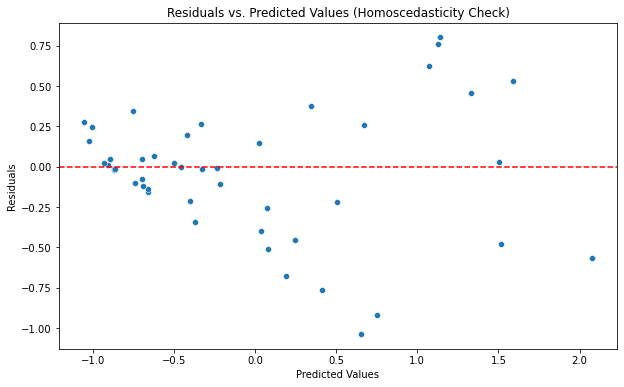

In [59]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import OLSInfluence

# Assuming ridge is already trained on X_train and y_train
# Predict on testing set
y_pred_r = ridge.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_r

# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_r, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [60]:
bp_test = het_breuschpagan(residuals, X_test)
print(f"Breusch-Pagan test p-value: {bp_test[1]}")

Breusch-Pagan test p-value: 0.017266756690324733
